<h1 align="center">Kaggle Competition - Image Processing</h1>
<img src=https://www.kaggle.com/content/v/4e5085eca1ab/kaggle/img/logos/kaggle-logo-transparent-300.png>

# ** Part 1: **
## **A - Quelques bases en Python**

### ** Usage du notebook en Python **
#### ** Quelques raccourcis sympas : **
#### ** Ctrl + Entrer = executer la cellule **
#### ** Maj + Entrer = executer la cellule et sélectionner la suivante **
#### ** Sélectionner une cellule + B = créer une céllule à la suite **
#### ** Sélectionner une cellule + D (2 fois) = supprimer la cellule sélectionnée (ATTENTION PAS RETOUR POSSIBLE) **

### ** String, variable, import **

In [ ]:
# This is a Python cell. You can run normal Python code here...
print 'The sum of 1 and 1 is {0}'.format(1+1)

In [ ]:
# Here is another Python cell, this time with a variable (x) declaration and an if statement:
x = 42
if x > 40:
    print 'The sum of 1 and 2 is {0}'.format(1+2)

In [ ]:
# This cell relies on x being defined already.
# If we didn't run the cells from part (1a) this code would fail.
print x * 2

In [ ]:
# Import the regular expression library
import re
m = re.search('(?<=abc)def', 'abcdef')
m.group(0)

In [ ]:
# Import the datetime library
import datetime
print 'This was last run on: {0}'.format(datetime.datetime.now())

### ** Python List, Dict and Set **

In [64]:
l = ['a', 'b', 'c', 'b']
print l

dic = {'a' : 1, 'b': "2", 'c' : 44}
print dic

s = set(l)
print s

['a', 'b', 'c', 'b']
{'a': 1, 'c': 44, 'b': '2'}
set(['a', 'c', 'b'])


In [65]:
#TODO check if letter "c" is in the set `s`
"c" in s

True

### ** Numpy **

In [73]:
import numpy as np
print np.__version__

1.10.4


In [69]:
# Create a list of integer from 0 to 9 in Python
range(10)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [70]:
# with Numpy
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [71]:
npa = np.arange(10)
?npa

In [72]:
# test the shape
print np.shape(npa)

(10,)


In [ ]:
npa.mean()

In [ ]:
npa.sum()

In [ ]:
npa.max()

In [ ]:
[x * x for x in npa]

In [ ]:
# boolean test
npa % 2 == 0

In [ ]:
# boolean filter
npa[npa % 2 == 0]

In [ ]:
# with a substancial gain in performance
np2 = np.arange(20000)

In [ ]:
%timeit [x for x in np2 if x % 2 == 0]

In [ ]:
%timeit np2[np2 % 2 == 0]

# ** Part 1: **
## **B - Introduction à la compétition Kaggle Digit Recognizer**

### ** Parcours du board de la compétition **

# ** Part 2: **
## **A - Méthodologie pour participer à une compétition Kaggle**

### ** Slides sur la compétition Kaggle **

# ** Part 2: **
## **B - Passage à la pratique : classification d'images**

In [1]:
import os
import sys
print sys.version
import numpy as np

2.7.10 |Anaconda 2.5.0 (x86_64)| (default, Oct 19 2015, 18:31:17) 
[GCC 4.2.1 (Apple Inc. build 5577)]


In [2]:
from sklearn import svm, metrics
from matplotlib import pyplot as plt
%matplotlib inline

### **Etape 1 - Importer, explorer et préparer la donnée**

In [3]:
### Define data path
base_path = os.getcwd()
digit_recognizer_path = os.path.join(base_path, 'data/digit-recognizer/')
print digit_recognizer_path

/Users/florentpajot/Code/Python-TDS/data/digit-recognizer/


In [4]:
### Import data
import csv
# train set
train_file = os.path.join(digit_recognizer_path, 'train.csv')
train_set = np.recfromcsv(train_file, delimiter=',', skip_header=0, dtype=int, filling_values=np.nan, case_sensitive=True, deletechars='', replace_space=' ')
# test set
test_file = os.path.join(digit_recognizer_path, 'test.csv')
test_set = np.recfromcsv(test_file, delimiter=',', skip_header=0, dtype=int, filling_values=np.nan, case_sensitive=True, deletechars='', replace_space=' ')

In [5]:
whos

Variable                Type        Data/Info
---------------------------------------------
base_path               str         /Users/florentpajot/Code/Python-TDS
csv                     module      <module 'csv' from '/User<...>a/lib/python2.7/csv.pyc'>
digit_recognizer_path   str         /Users/florentpajot/Code/<...>DS/data/digit-recognizer/
metrics                 module      <module 'sklearn.metrics'<...>rn/metrics/__init__.pyc'>
np                      module      <module 'numpy' from '/Us<...>ages/numpy/__init__.pyc'>
os                      module      <module 'os' from '/Users<...>da/lib/python2.7/os.pyc'>
plt                     module      <module 'matplotlib.pyplo<...>s/matplotlib/pyplot.pyc'>
svm                     module      <module 'sklearn.svm' fro<...>klearn/svm/__init__.pyc'>
sys                     module      <module 'sys' (built-in)>
test_file               str         /Users/florentpajot/Code/<...>digit-recognizer/test.csv
test_set                recarray    [ 

In [29]:
#TODO afficher le premier élément de mon jeu de données
train_set[0] # On voit que chaque élément de mon tableau est un tuple

(1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 188, 255, 94, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 191, 250, 253, 93, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 123, 248, 253, 167, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 80, 247, 253, 208, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 29, 207, 253, 235, 77, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 54, 209, 253, 253, 88, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 93, 254, 253, 238, 170, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [30]:
#TODO afficher la taille de mon train set
print type(train_set[0])
print np.shape(train_set)

<class 'numpy.record'>
(42000,)


In [31]:
print "Le fichier d'entrainement contient {} lignes".format(len(train_set))

Le fichier d'entrainement contient 42000 lignes


In [6]:
# J'aimeras ne manipuler que des tableaux (donc avoir un tableau de tableau = matrice)
train_set = [np.array(record.tolist()) for record in train_set]
test_set = [np.array(record.tolist()) for record in test_set]

In [85]:
print type(train_set[0])

<type 'numpy.ndarray'>


In [86]:
print np.shape(train_set)

(42000, 785)


In [55]:
# On souhaite manipuler une matrice de 42000 par 784 
#m = len(train_set)
#train_set = np.array(train_set).reshape(m, -1)

In [81]:
#np.shape(train_set) # Ah, on a une matrice de 42000 par 785, donc une valeur en trop...

(42000, 782)

In [87]:
train_set[0] # la première valeur est un 1, d'où vient-il ?

array([  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [51]:
train_set[range(20),0] # on s'aperçoit que ce sont des valeurs entre 0 et 9
# Un petit tour dans la doc de la compétition nous permet de voir que ces entiers sont les labels de chaque image

array([1, 0, 1, 4, 0, 0, 7, 3, 5, 3, 8, 9, 1, 3, 3, 1, 2, 0, 7, 5])

In [7]:
# On extrait les labels
labels = [record[0] for record in train_set]
train_set = [record[1:] for record in train_set]
print np.shape(train_set)
print np.shape(labels)

(42000, 784)
(42000,)


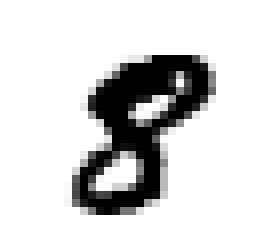

In [8]:
# On visualize notre train_set
plt.axis('off')
plt.imshow(train_set[10].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')

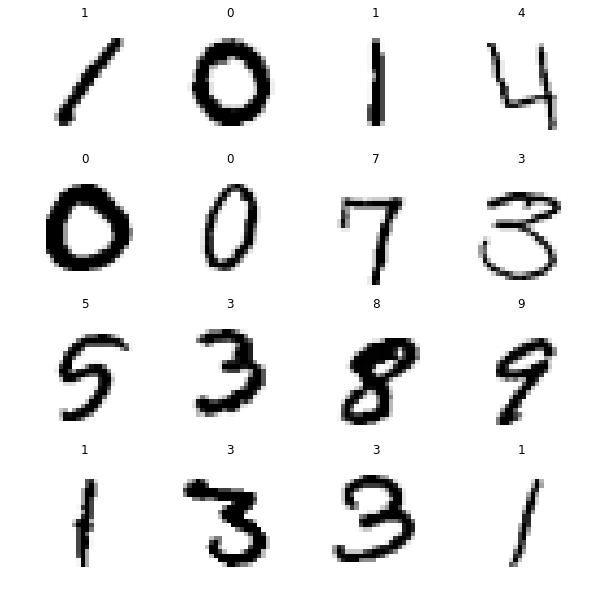

In [101]:
# On peut aussi afficher plusieurs images
f, axes = plt.subplots(4,4, figsize=(10,10))
for i in range(4):
    for j in range(4):
        axes[i, j].imshow(train_set[4*i+j].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
        axes[i, j].axis('off')
        axes[i, j].set_title("{}".format(labels[4*i+j]))
        axes[i, j].xticks = ()
        axes[i, j].yticks = ()

# Vu ce qu'on obtient on est certain d'avoir convenablement construit notre jeu d'entraintement et nos labels

### **Etape 2 - Pré-traitement de la donnée**

In [9]:
# Ici, nous allons centrer et réduire les données afin d'éviter les problèmes par la suite
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Montrer fit(), transform(), fit_transform() et les appliquer
scaled_train_set = scaler.fit_transform(train_set)
scaled_test_set = scaler.transform(test_set)

### **Etape 3 - Construction d'un set de validation croisée**

In [10]:
# Ici, nous allons utiliser la méthode la plus simple, celle du "validation set"
import math, random

def split_data(data, prob):
    """split data into fractions [prob, 1 - prob]"""
    results = [], []
    for row in data:
        results[0 if random.random() < prob else 1].append(row)
    return results

def train_val_split(x, y, val_pct):
    """split data and corresponding labels into fractions [prob, 1 - prob]"""
    data = zip(x, y)                              
    train, val = split_data(data, 1 - val_pct)  
    x_train, y_train = zip(*train)                # magical un-zip trick
    x_val, y_val = zip(*val)
    return x_train, x_val, y_train, y_val

# On utilise les fonctions précédentes pour séparer le train set en 2 sets
x_train, x_val, y_train, y_val = train_val_split(scaled_train_set, labels, val_pct = 0.33) #on prend 1/3
print np.shape(x_train)
print np.shape(y_train)
print np.shape(x_val)
print np.shape(y_val)

(28293, 784)
(28293,)
(13707, 784)
(13707,)


### **Etape 4 - Construction d'un modèle de référence**

In [137]:
# Nous allons construire un modèle de type Random Forest qui nous servira de référence
from sklearn.ensemble import RandomForestClassifier
n_tree = 50
model_rf_1 = RandomForestClassifier(n_estimators=n_tree, n_jobs=-1)
# on ignore volontairement les autres paramètres que l'on pourrait spécifier (min_samples_leaf par exemple)

# On va d'abord l'appliquer aux données d'entrainement pour voir ce que ça donne
model_rf_1.fit(x_train, y_train)
#TODO, utiliser le modèle pour déterminer le labels du test set
results_rf_1 = model_rf.predict(scaled_test_set) #je check au préalable si je veux obtenir une proba ou une classe en fonction des règles de la compétition

In [111]:
#TODO, afficher les 10 premiers résultats
print results_rf_1[0:10]
print np.shape(results_rf_1)

[2 0 9 4 3 7 0 3 0 3]
(28000,)


### **Etape 5 - Faire sa première soumission**

In [11]:
# Pour gagner du temps par la suite, il est utile de construire une fonction qui permettra
# d'écrire les résultats obtenus dans un fichier de soumission dans le format imposé
def create_submission(submission_name, predictions):
    file_name = submission_name + ".csv"
    with open(file_name, 'wb') as csvfile:
        try:
            writer = csv.writer(csvfile, delimiter=',', quotechar='|')
            writer.writerow(("ImageId", "Label"))
            for index, value in enumerate(predictions):
                writer.writerow((index+1, value))
        except:
            print "1 erreure rencontrer lors de l'écriture. Le fichier de soumission est invalide"
            pass
    csvfile.close()
# ATTENTION, le format de sortie est spécifique à la compétition Digit Recognizer

In [133]:
#TODO, créez votre première soumission
create_submission("rf_1", results_rf_1)

### **Etape 6 - Evaluer son modèle**

In [144]:
# Nous allons utiliser le set de validation croisée de tout à l'heure
# TODO, utiliser le modèle pour déterminer les labels du set de validation x_val
predictions_rf_1 = model_rf_1.predict(x_val)

In [145]:
# Première évaluation de notre classifieur
from sklearn import metrics
# Tout d'abord le rapport de classification proposé dans sklearn
print("Rapport de classification pour le modèle %s:\n%s\n" % (model_rf_1, metrics.classification_report(y_val, predictions_rf_1)))

Rapport de classification pour le modèle RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False):
             precision    recall  f1-score   support

          0       0.96      0.99      0.97      1342
          1       0.98      0.99      0.98      1534
          2       0.94      0.96      0.95      1357
          3       0.95      0.94      0.94      1446
          4       0.96      0.96      0.96      1450
          5       0.96      0.94      0.95      1288
          6       0.96      0.98      0.97      1401
          7       0.97      0.96      0.96      1530
          8       0.96      0.94      0.95      1396
          9       0.93      0.93      0.93      1380

avg / total     

In [146]:
# Ensuite la matrice de confusion
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_val, predictions_rf_1))

Confusion matrix:
[[1322    0    0    1    2    1    9    0    5    2]
 [   0 1512    6    4    3    0    4    2    3    0]
 [   6    1 1296    9    8    1   10   12    9    5]
 [   3    2   28 1359    1   19    1   10   17    6]
 [   4    2    4    0 1398    0    7    1    3   31]
 [   8    4    1   30    4 1213    7    3    7   11]
 [  12    3    1    0    1   12 1368    0    4    0]
 [   1    3   26    3    7    0    0 1468    0   22]
 [   6    9    8   17    7   11    9    1 1315   13]
 [  12    1    4   12   25    5    3   17   13 1288]]


In [12]:
# Il est également utile de construire une méthode d'évaluation spécifique au concours
from __future__ import division
def evaluate_model(labels, predictions):
    true_count = 0
    for index, label in enumerate(labels):
        if predictions[index] == label:
            true_count +=1
    return true_count/len(labels)

print evaluate_model(y_val, predictions_rf_1) # à comparer au résultat obtenu sur le leaderboard

### **Etape 7 - Incrémentez ! Optimisation et test d'autres modèles**
#### **Optimisation du RandomForest**


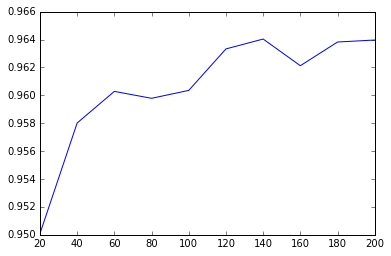

In [155]:
# Peut-on faire mieux que précédemment en optimisant notre modèle ?
# Par exemple, modifier le nombre d'arbres peut-il nous faire progresser ?
n_trees = np.arange(20,201,20)
scores = list()
for n_tree in n_trees:
    model = RandomForestClassifier(n_tree, n_jobs=-1)
    model.fit(x_train, y_train)
    scores.append(model.score(x_val, y_val)) # la méthode score renvoie la moyenne de la précision des arbres générés
plt.plot(n_trees, scores)

In [156]:
# Cela veut dire que nous pouvons obtenir un meilleur résultat pour n_tree = 120 par exemple
model_rf_2 = RandomForestClassifier(n_estimators=120, n_jobs=-1)
model_rf_2.fit(x_train, y_train)
predictions_rf_2 = model_rf_2.predict(x_val)

In [157]:
print evaluate_model(y_val, predictions_rf_2)

0.96261682243


#### **Test d'un nouveau modèle**

In [162]:
# Maintenant, testons un autre modèle de classification
# Par exemple un SVM
from sklearn import svm
model_svm_1 = svm.SVC(C=1, gamma=0.001, cache_size=500)
#TODO, évaluer le modèle sur le set de validation croisée
model_svm_1.fit(x_train, y_train)
predictions_svm_1 = model_svm_1.predict(x_val)

In [163]:
print evaluate_model(y_val, predictions_svm_1) #pas mieux mais non optimisé

0.953412630983


#### **Exemple d'optimisation automatique du SVM**

In [166]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.cross_validation import cross_val_score
from sklearn import svm

def hyperopt_train_test(params): # on définit une fonction d'évaluation de notre model que l'on va ici chercher à maximiser

    X_  = scaled_train_set
    if 'normalize' in params:
        if params['normalize'] == 1:
            X_ = normalize(X_)
            del params['normalize']


    if 'scale' in params:
        if params['scale'] == 1:
            X_ = scale(X_)
            del params['scale']
    classifier = svm.SVC(**params)
    return cross_val_score(classifier, X_, labels, cv=1, n_jobs=-1, verbose=1).mean()

space4svm  = {
    'C': hp.uniform('C', 0, 20),
    'kernel': hp.choice('kernel', ['linear', 'sigmoid', 'poly', 'rbf']),
    'gamma': hp.uniform('gamma',0,20),
    #'scale':hp.choice('scale', [0,1]),
    #'normalize': hp.choice('normalize', [0,1])
}
 
def f(params): # la fonctionà évaluer
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}
 
trials = Trials()
best = fmin(f, space4svm, algo=tpe.suggest, max_evals=100, trials=trials)
print 'best:'

print best

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'gamma': array([  1.00000e-06,   3.59381e-06,   1.29155e-05,   4.64159e-05,
         1.66810e-04,   5.99484e-04,   2.15443e-03,   7.74264e-03,
         2.78256e-02,   1.00000e-01])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [ ]:
parameters = ['C', 'kernel', 'gamma']
cols = len(parameters)
f, axes = plt.subplots(nrows=1, ncols=cols, figsize=(20,5))
cmap = plt.cm.jet
for i, val in enumerate(parameters):
    xs = np.array([t['misc']['vals'][val] for t in trials.trials]).ravel()
    ys = [-t['result']['loss'] for t in trials.trials]
    xs, ys = zip(\*sorted(zip(xs, ys)))
    axes[i].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.25, c=cmap(float(i)/len(parameters)))
    axes[i].set_title(val)
    axes[i].set_ylim([0.9, 1.0])

#### **Utilisation d'un réseau de neurones à convolutions**

In [24]:
from keras.layers import Dense, Activation, Dropout
from keras.models import Model, Sequential
from keras.optimizers import SGD

# Keras a un fonctionnement séquentiel, nous allons déclarer les couches de notre réseau de neurones 
# qui seront ensuite passées à un constructeur
kerasNet1 = Sequential([
        Dense(200, batch_input_shape=(None,784), init='uniform'), #None means batch of any size
        Activation('tanh'),
        Dense(10),
        Activation('softmax'),
    ])
# On déclare également une fonction d'optimisation et ses paramètres (learning rate, initialisation des poids...)
sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)

# On fait appel au constructeur qui compile les différents objets créés précédemment
kerasNet1.compile(optimizer=sgd,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


In [25]:
# Afin de pouvoir entrainer notre modèle, nous devons convertir les labels dans un format binaire
from keras.utils.np_utils import to_categorical
y_train_b = to_categorical(y_train)
y_val_b = to_categorical(y_val)

In [26]:
# On entraine le modèle
x_train  = np.array(x_train)
x_val = np.array(x_val)
kerasNet1.fit(x_train, y_train_b, nb_epoch=10, batch_size=100, verbose=1)

Epoch 1/10
28293/28293 [==============================] - 1s - loss: 2.3012 - acc: 0.1536     
Epoch 2/10
28293/28293 [==============================] - 1s - loss: 2.2994 - acc: 0.1232     
Epoch 3/10
28293/28293 [==============================] - 1s - loss: 2.2976 - acc: 0.1132     
Epoch 4/10
28293/28293 [==============================] - 1s - loss: 2.2960 - acc: 0.1130     
Epoch 5/10
28293/28293 [==============================] - 1s - loss: 2.2944 - acc: 0.1124     
Epoch 6/10
28293/28293 [==============================] - 1s - loss: 2.2928 - acc: 0.1126     
Epoch 7/10
28293/28293 [==============================] - 1s - loss: 2.2912 - acc: 0.1130     
Epoch 8/10
28293/28293 [==============================] - 1s - loss: 2.2894 - acc: 0.1134     
Epoch 9/10
28293/28293 [==============================] - 1s - loss: 2.2873 - acc: 0.1142     
Epoch 10/10
28293/28293 [==============================] - 1s - loss: 2.2845 - acc: 0.1146     


In [35]:
x_train  = np.array(x_train)
x_val = np.array(x_val)

In [34]:
predictions_cnn_1 = kerasNet1.predict(np.array(x_val))

In [1]:
# Etudions la manière dont notre modèle se généralise, pour cela on va de nouveau entrainer notre modèle
# Puis, pour l'occasion j'ai créé des fonctions de callback
from keras.callbacks import Callback

class TrainingHistory(Callback):
    def on_train_begin(self, logs={}):
        self.train_losses = [] # init losses list
        self.val_losses = [] # init losses list

    def on_epoch_end(self, batch, logs={}): #we could use on_batch_end
        self.train_losses.append(logs.get('loss')) # append losses to the list
        self.val_losses.append(logs.get('val_loss')) # append losses to the list
            
history = TrainingHistory() # instanciate the custom callback object

# we fit once again the model but this time using the custom callback object
kerasNet1.fit(x_train, y_train_b, nb_epoch=50, batch_size=100, validation_data=(x_val, y_val_b), callbacks=[history])

Using Theano backend.


NameError: name 'kerasNet1' is not defined

In [ ]:
# Visualisons l'erreure commise par notre modèle
fig = plt.figure(figsize=(5, 2.5))
x = np.linspace(0, len(history.train_losses),len(history.train_losses))
plt.plot(x, history.val_losses,  label='val_losses')
plt.plot(x, history.train_losses,  label='train_losses')
plt.legend(loc='upper right')
plt.show()

### **Etape 8 - Incrémentez ! Feature Engineering**

In [ ]:
# Il n'y a pas trop de place pour le feature engineering ici dans le sens de la création de nouvelles variables
# En revanche, on pourrait faire en sorte d'augmenter artificiellement le nombre de données en entrée de notre modèle
# ce qui nous permettrait d'avoir un apprentissage plus performant (on appelle ça de la Data Augmentation)

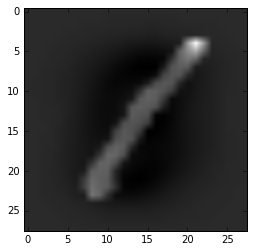

In [20]:
plt.imshow(x_train[0].reshape(28,28), cmap='gray')

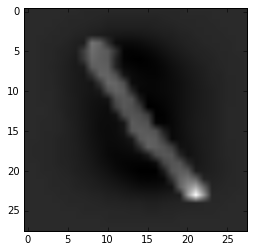

In [24]:
plt.imshow(x_train[0].reshape(28,28)[::-1], cmap='gray')

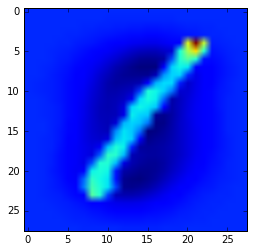

In [28]:
# Pour cela, nous allons effectuer des transformations sur les images de notre jeu d'entraintement
# Par exemple, nous pouvons retourner chaque image
x_flipped = [img.reshape(28,28)[::-1].flatten() for img in x_train]
plt.imshow(x_train[0].reshape(28,28))

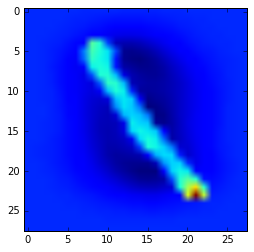

In [27]:
plt.imshow(x_flipped[0].reshape(28,28))

In [33]:
# On peut donc constituer un nouveau jeu de donnée plus important
x_enhanced = np.concatenate((x_train, x_flipped), axis=0)
y_enhanced = np.concatenate((y_train, y_train), axis=0)
print np.shape(x_enhanced)
print np.shape(y_enhanced)

(56384, 784)
(56384,)


# ** Part 3: **
## **A - Allons plus loin : Facial Keypoints Detection**

### **Etape 1 - Importer, explorer et préparer la donnée**

### **Etape 2 - Pré-traitement de la donnée**

### **Etape 3 - Création d'un set de validation croisée**

# ** Part 3: **
## **B - Réseaux de neurones avec Keras**